<a href="https://colab.research.google.com/github/fabsakae/AgeChecker/blob/main/agentesIA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AULA 01

In [1]:
!pip install -q langchain langchain-google-genai google-generativeai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.1 MB/s eta 0:00:00


importação da api key do AI studio

In [2]:
from google.colab import userdata
from langchain_google_genai import ChatGoogleGenerativeAI

GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

Preparar qual modelo que utilizaremos, chamar o modelo, chamar a biblioteca. conecta nossa variavel llm ao modelo do gemini

In [3]:
llm = ChatGoogleGenerativeAI(
    model='gemini-2.5-flash', temperature=0,
    api_key=GOOGLE_API_KEY
)

Este trecho de código inicializa um modelo de linguagem grande (LLM) da biblioteca `langchain-google-genai`.

*   `llm = ChatGoogleGenerativeAI(...)`: Esta linha cria uma instância da classe `ChatGoogleGenerativeAI`, que é um wrapper em torno dos modelos de IA Generativa do Google, especificamente projetado para interações baseadas em chat dentro da estrutura LangChain.
*   `model='gemini-2.5-flash'`: Este argumento especifica qual modelo usar. Neste caso, é o modelo 'gemini-2.5-flash'.
*   `temperature=0`: Isso define o parâmetro de temperatura para o modelo. Uma temperatura de 0 torna a saída do modelo mais determinística e menos criativa. Temperaturas mais altas resultam em saídas mais variadas e potencialmente mais criativas.
*   `api_key=GOOGLE_API_KEY`: Isso fornece a chave de API necessária para autenticar com o serviço de IA Generativa do Google. A variável `GOOGLE_API_KEY` é assumida como tendo sido carregada em uma etapa anterior (provavelmente do `userdata` do Colab).

Em essência, este código configura um modelo específico de IA Generativa do Google (`gemini-2.5-flash`) com uma baixa temperatura para respostas previsíveis, tornando-o pronto para ser usado para gerar texto com base em prompts dentro da estrutura LangChain.

primeira saida do modelo resp_test = llm.invoke('Quem é voçê?'): Esta linha usa o objeto llm (nosso modelo Gemini) para invocar uma chamada com o prompt "Quem é você?". O método invoke envia o prompt para o modelo e obtém a resposta. O resultado é armazenado na variável resp_test.
print(resp_test): Esta linha imprime o conteúdo da variável resp_test. A saída que você vê (como content='Eu sou um modelo de linguagem grande, treinado pelo Google.' ...) é o objeto de resposta retornado pela biblioteca LangChain, que inclui a resposta do modelo na propriedade content.

In [4]:
resp_test = llm.invoke('Quem é você? Com detalhes')
print(resp_test.content)

Olá! Que ótima pergunta. Vou me apresentar com o máximo de detalhes possível para que você entenda bem quem eu sou.

**Em essência, eu sou um Modelo de Linguagem Grande (LLM - Large Language Model).**

Vamos destrinchar isso:

1.  **Sou uma Inteligência Artificial (IA):**
    *   Não sou um ser humano, não tenho corpo físico, consciência, emoções, sentimentos, opiniões pessoais, crenças ou experiências de vida.
    *   Minha "existência" é puramente digital, como um programa de computador complexo.

2.  **Desenvolvido por Google:**
    *   Fui criado e treinado por engenheiros e pesquisadores do Google. Sou um produto de anos de pesquisa e desenvolvimento em inteligência artificial.

3.  **Modelo de Linguagem Grande (LLM):**
    *   **"Modelo de Linguagem":** Significa que minha principal função é processar e gerar texto. Fui projetado para entender a linguagem humana (e outras, como código de programação) e produzir respostas coerentes e relevantes.
    *   **"Grande":** Refere-se à e

Criar o Prompt do sistema para explicar ao agente o que ele deve fazer

In [5]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

Conectar com llm  Este trecho de código define um modelo de dados usando a biblioteca pydantic.

from pydantic import BaseModel, Field: Importa as classes BaseModel e Field da biblioteca pydantic. BaseModel é a classe base para criar modelos de dados, e Field é usada para fornecer informações adicionais sobre os campos do modelo.
from typing import Literal, List, Dict: Importa tipos do módulo typing para fornecer anotações de tipo mais específicas. Literal permite especificar que um valor deve ser um de um conjunto fixo de strings, List indica uma lista e Dict indica um dicionário.
class TriagemOut(BaseModel):: Define uma nova classe chamada TriagemOut que herda de BaseModel. Isso a torna um modelo de dados Pydantic.
decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]: Define um campo decisao que deve ser uma das strings literais especificadas.
urgencia: Literal["BAIXA", "MEDIA", "ALTA"]: Define um campo urgencia que deve ser uma das strings literais especificadas.
campos_faltantes: List[str] = Field(default_factory=list): Define um campo campos_faltantes que deve ser uma lista de strings. Field(default_factory=list) define o valor padrão para este campo como uma lista vazia se nenhum valor for fornecido.
Em resumo, este código cria uma estrutura de dados (TriagemOut) para representar a saída do processo de triagem, garantindo que os campos decisao e urgencia tenham valores específicos e que campos_faltantes seja uma lista de strings, com uma lista vazia como valor padrão. Isso é útil para estruturar e validar a saída de um modelo de linguagem ou outro processo.

In [6]:
from pydantic import BaseModel, Field
from typing import Literal, List, Dict

class TriagemOut(BaseModel):
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    campos_faltantes: List[str] = Field(default_factory=list)

Criar um llm especifico para triagem

In [7]:
llm_triagem = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0.0,
    api_key=GOOGLE_API_KEY
)

Conectar .  trecho de código configura uma cadeia (chain) usando a biblioteca LangChain para processar mensagens de triagem com base em um prompt e um modelo de saída estruturado.

from langchain_core.messages import SystemMessage, HumanMessage: Importa as classes SystemMessage e HumanMessage, usadas para representar mensagens no contexto de uma conversa com um modelo de linguagem. SystemMessage geralmente define o comportamento ou as instruções para o modelo, enquanto HumanMessage representa a entrada do usuário.
triagem_chain = llm_triagem.with_structured_output(TriagemOut): Esta linha cria uma nova cadeia (triagem_chain) a partir do modelo de linguagem llm_triagem. O método with_structured_output(TriagemOut) configura a cadeia para que a saída do modelo seja automaticamente parseada e validada de acordo com o modelo Pydantic TriagemOut que definimos anteriormente. Isso garante que a resposta do modelo tenha o formato JSON esperado com os campos decisao, urgencia e campos_faltantes.
def triagem(mensagem: str) -> Dict:: Define uma função chamada triagem que recebe uma string (mensagem) como entrada e é anotada para retornar um dicionário (Dict).
saida: TriagemOut = triagem_chain.invoke([ ... ]): Dentro da função triagem, esta linha invoca a cadeia triagem_chain. O método invoke recebe uma lista de mensagens. Neste caso, a lista contém:
SystemMessage(content=TRIAGEM_PROMPT): Uma mensagem do sistema contendo o texto do prompt de triagem definido na variável TRIAGEM_PROMPT. Isso instrui o modelo sobre seu papel e as regras de triagem.
HumanMessage(content=mensagem): Uma mensagem humana contendo a mensagem fornecida como entrada para a função triagem. A saída desta invocação é um objeto do tipo TriagemOut (graças ao with_structured_output), que é armazenado na variável saida.
return saida.model_dump(): Esta linha converte o objeto Pydantic saida em um dicionário Python nativo usando o método model_dump() e retorna este dicionário como a saída da função triagem.
Em resumo, este código cria uma função triagem que utiliza uma cadeia LangChain para enviar uma mensagem do usuário e um prompt do sistema para um modelo de linguagem (llm_triagem). A cadeia é configurada para garantir que a resposta do modelo seja um JSON estruturado de acordo com o modelo TriagemOut, e a função retorna essa saída estruturada como um dicionário.

In [8]:
from langchain_core.messages import SystemMessage, HumanMessage

triagem_chain = llm_triagem.with_structured_output(TriagemOut)

def triagem(mensagem: str) -> Dict:
    saida: TriagemOut = triagem_chain.invoke([
        SystemMessage(content=TRIAGEM_PROMPT),
        HumanMessage(content=mensagem)
    ])

    return saida.model_dump()

Mensagens para o agente

In [9]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

fazer um for para ENVIAR CADA MENSAGEm por vez. Este código itera sobre uma lista de mensagens de teste e aplica a função de triagem a cada uma delas.

for msg_teste in testes:: Esta linha inicia um loop for que irá percorrer cada item na lista chamada testes. Em cada iteração do loop, o item atual da lista será atribuído à variável msg_teste.
print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n"): Dentro do loop, esta linha imprime a pergunta atual e a resposta da triagem para essa pergunta.
f"Pergunta: {msg_teste}\n -> Resposta: {...}\n": Usa uma f-string para formatar a saída. Ela imprime o texto "Pergunta: " seguido pelo valor da variável msg_teste, uma quebra de linha (\n), o texto " -> Resposta: ", o resultado da chamada da função triagem(msg_teste), e outra quebra de linha.
triagem(msg_teste): Chama a função triagem (que definimos anteriormente) passando a mensagem de teste atual (msg_teste) como argumento. Esta função processa a mensagem usando o modelo de linguagem e retorna um dicionário com a decisão, urgência e campos faltantes.
Em resumo, este código executa a função triagem para cada uma das mensagens na lista testes e imprime o resultado da triagem para cada mensagem de forma clara.

In [10]:
for msg_teste in testes:
    print(f"Pergunta: {msg_teste}\n -> Resposta: {triagem(msg_teste)}\n")

Pergunta: Posso reembolsar a internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais 5 dias de trabalho remoto. Como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: Posso reembolsar cursos ou treinamentos da Alura?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no Rio Pinheiros?
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': ['informacao_relevante']}



AULA 02 - Base do conhecimento RAG

import bibliotecas para utilizar o RAG (RAG (Retrieval-Augmented Generation), ou Geração Aumentada de Recuperação, é uma técnica de IA que combina a recuperação de informações de bases de dados externas com a capacidade de um modelo de linguagem (LLM) de gerar texto. Ao conectar um LLM a uma base de conhecimento confiável e atualizada, o sistema RAG produz respostas mais precisas, relevantes e contextuais do que os modelos puramente generativos)

O código selecionado instala as bibliotecas necessárias para implementar um sistema de Geração Aumentada de Recuperação (RAG).

!pip install -q --upgrade ...: Este é um comando de shell executado no ambiente Colab usando o prefixo !.

-q: Significa "quiet" (silencioso), que suprime a saída do processo de instalação.

--upgrade: Garante que, se as bibliotecas já estiverem instaladas, elas sejam atualizadas para a versão mais recente.

langchain_community: Instala o pacote comunitário do LangChain, que contém várias integrações e ferramentas para construir aplicações com modelos de linguagem, incluindo componentes para RAG.

faiss-cpu: Instala a versão para CPU do FAISS (Facebook AI Similarity Search). O FAISS é uma biblioteca para busca de similaridade eficiente e agrupamento de vetores densos, comumente usada em RAG para indexação e busca de embeddings de documentos.

langchain-text-splitters: Instala a biblioteca LangChain text splitter, usada para dividir documentos grandes em pedaços menores, o que é uma etapa crucial na preparação de dados para sistemas RAG.

pymupdf: Instala o PyMuPDF, uma biblioteca Python para trabalhar com documentos PDF. Isso provavelmente está incluído para permitir que o sistema RAG processe informações de arquivos PDF.

Em essência, este código configura o ambiente instalando as bibliotecas principais necessárias para construir um sistema RAG que pode recuperar informações de documentos externos (potencialmente PDFs) e usar essas informações para aumentar as respostas do modelo de linguagem.



In [11]:
!pip install -q --upgrade langchain_community faiss-cpu langchain-text-splitters pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


Os Documentos que serão utilizados no RAG

In [12]:
from pathlib import Path
from langchain_community.document_loaders import PyMuPDFLoader

docs = []

for n in Path("/content/").glob("*.pdf"):
    try:
        loader = PyMuPDFLoader(str(n))
        docs.extend(loader.load())
        print(f"Carregado com sucesso arquivo {n.name}")
    except Exception as e:
        print(f"Erro ao carregar arquivo {n.name}: {e}")

print(f"Total de documentos carregados: {len(docs)}")

Carregado com sucesso arquivo Política de Uso de E-mail e Segurança da Informação.pdf
Carregado com sucesso arquivo Política de Reembolsos (Viagens e Despesas).pdf
Carregado com sucesso arquivo Políticas de Home Office.pdf
Total de documentos carregados: 3


Este trecho de código carrega documentos PDF localizados
na pasta /content/ em um formato que pode ser usado por sistemas de Geração Aumentada de Recuperação (RAG) com o LangChain.

from pathlib import Path: Importa a classe Path do módulo pathlib, que fornece uma maneira orientada a objetos para interagir com caminhos de sistema de arquivos.
from langchain_community.document_loaders import PyMuPDFLoader: Importa a classe PyMuPDFLoader do langchain_community.document_loaders. Este loader é especializado em carregar o conteúdo de arquivos PDF usando a biblioteca PyMuPDF.
docs = []: Inicializa uma lista vazia chamada docs. Esta lista será usada para armazenar os documentos carregados dos arquivos PDF.
for n in Path("/content/").glob("*.pdf"):: Inicia um loop que itera sobre todos os arquivos que terminam com .pdf (ignorando maiúsculas/minúsculas, mas *.pdf é mais comum) dentro do diretório /content/. Path("/content/") cria um objeto Path para o diretório /content/, e .glob("*.pdf") encontra todos os arquivos que correspondem ao padrão.
try...except Exception as e:: Este é um bloco de tratamento de exceções. Ele tenta executar o código dentro do bloco try. Se ocorrer um erro durante a execução, o código dentro do bloco except será executado, capturando a exceção no objeto e. Isso impede que o notebook pare se houver um problema com um arquivo PDF específico.
loader = PyMuPDFLoader(str(n)): Dentro do bloco try, cria uma instância do PyMuPDFLoader. Ele recebe o caminho do arquivo PDF atual (n) convertido para string (str(n)) como argumento.
docs.extend(loader.load()): Carrega o conteúdo do arquivo PDF usando o método load() do loader. O método load() retorna uma lista de objetos Document (do LangChain), onde cada objeto representa uma página do PDF. O método extend() adiciona todos esses objetos Document à lista docs.
print(f"Carregado com sucesso arquivo {n.name}"): Se o arquivo for carregado com sucesso, imprime uma mensagem indicando qual arquivo foi carregado. n.name retorna apenas o nome do arquivo (sem o caminho completo).
print(f"Erro ao carregar arquivo {n.name}: {e}"): Se ocorrer um erro durante o carregamento, imprime uma mensagem de erro indicando qual arquivo falhou e qual foi o erro (e).
print(f"Total de documentos carregados: {len(docs)}"): Após o loop, imprime o número total de objetos Document (páginas de PDF) que foram carregados na lista docs.
Em resumo, este código escaneia o diretório /content/ em busca de arquivos PDF, tenta carregar cada um deles usando o PyMuPDFLoader, armazena o conteúdo (cada página como um documento separado) na lista docs e relata o sucesso ou falha do carregamento de cada arquivo, além do total de documentos carregados.



Bibliotecas para separar as informações

In [13]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

chunks = splitter.split_documents(docs)

Este trecho de código utiliza a biblioteca LangChain para dividir os documentos carregados em pedaços menores (chunks), o que é uma etapa essencial na preparação de dados para sistemas RAG.

from langchain_text_splitters import RecursiveCharacterTextSplitter: Importa a classe RecursiveCharacterTextSplitter da biblioteca langchain_text_splitters. Este é um tipo de text splitter que tenta dividir o texto recursivamente usando uma lista de caracteres.
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30): Cria uma instância do RecursiveCharacterTextSplitter com dois parâmetros importantes:
chunk_size=300: Define o tamanho máximo de cada pedaço (chunk) em caracteres. O splitter tentará fazer com que cada pedaço tenha no máximo 300 caracteres.
chunk_overlap=30: Define o número de caracteres que os pedaços consecutivos irão sobrepor. Uma sobreposição ajuda a garantir que o contexto não seja perdido entre os pedaços, o que é importante para a recuperação de informações.
chunks = splitter.split_documents(docs): Utiliza a instância do splitter (splitter) para dividir a lista de documentos carregados (docs) em pedaços menores. O método split_documents() processa cada documento na lista docs e retorna uma nova lista (chunks) contendo os pedaços resultantes.
Em resumo, este código configura um divisor de texto para quebrar os documentos PDF carregados em segmentos de no máximo 300 caracteres, com uma sobreposição de 30 caracteres entre eles. Esses chunks são então armazenados na variável chunks e estão prontos para serem usados na próxima etapa do pipeline RAG, que geralmente envolve a criação de embeddings e a indexação em um banco de dados vetorial.

In [14]:
for chunk in chunks:
    print(chunk)
    print("------------------------------------")

page_content='Política de Uso de E-mail e Segurança 
da Informação 
 
1.​ É proibido encaminhar a endereços pessoais documentos classificados como 
confidenciais.​
 
2.​ Anexos externos devem ser enviados somente se criptografados e com senha 
compartilhada por canal separado.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'file_path': '/content/Política de Uso de E-mail e Segurança da Informação.pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Uso de E-mail e Segurança da Informação', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
------------------------------------
page_content='3.​ Phishing: verifique remetente e domínios suspeitos. Reporte mensagens suspeitas 
ao time de Segurança imediatamente.​
 
4.​ Retenção: mensagens que contenham dados pessoais devem

Este trecho de código itera sobre a lista de pedaços de documentos (chunks) que foram criados na etapa anterior e imprime cada um deles, seguido por uma linha separadora para facilitar a visualização.

for chunk in chunks:: Inicia um loop for que irá percorrer cada item na lista chamada chunks. Em cada iteração do loop, o item atual da lista (que é um objeto Document representando um pedaço do texto original) será atribuído à variável chunk.
print(chunk): Imprime o conteúdo do objeto chunk atual. Quando você imprime um objeto Document do LangChain, ele geralmente mostra metadados associados ao pedaço (como a fonte ou o número da página) e o conteúdo textual do pedaço.
print("------------------------------------"): Imprime uma linha de traços para criar uma separação visual entre a saída de cada pedaço de documento. Isso torna mais fácil ver onde um pedaço termina e o próximo começa na saída do console.
Em resumo, este código é uma maneira simples de inspecionar os pedaços de documentos gerados pelo text splitter, permitindo que você veja como os documentos originais foram divididos e qual conteúdo está contido em cada pedaço. Isso é útil para verificar se a divisão foi feita conforme o esperado antes de prosseguir com as próximas etapas do pipeline RAG.

Agora realizar uma busca, e dentro desse espaço de vetores baseados nos chunks qual sera a proximidade dos chunks. (Embeddings são representações numéricas de objetos do mundo real que sistemas de aprendizado de máquina (ML) e inteligência artificial (IA) usam para entender domínios de conhecimento complexos como os humanos.Os embeddings representam objetos do mundo real, como palavras, imagens ou vídeos, em uma forma que os computadores podem processar.)

Importar biblioteca para embedding

In [15]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

embeddings = GoogleGenerativeAIEmbeddings(
    model="models/gemini-embedding-001",
    google_api_key=GOOGLE_API_KEY
)

Este trecho de código inicializa um modelo de embeddings do Google Generative AI. Embeddings são representações numéricas de texto que capturam o significado semântico das palavras e frases, o que é essencial para a busca de similaridade em sistemas RAG.

from langchain_google_genai import GoogleGenerativeAIEmbeddings: Importa a classe GoogleGenerativeAIEmbeddings do módulo langchain_google_genai. Esta classe permite criar embeddings usando os modelos de embedding do Google.
embeddings = GoogleGenerativeAIEmbeddings(...): Cria uma instância da classe GoogleGenerativeAIEmbeddings, configurando o modelo de embedding e a chave de API.
model="models/gemini-embedding-001": Especifica qual modelo de embedding do Google será utilizado. gemini-embedding-001 é um modelo de embedding projetado para gerar representações vetoriais de texto.
google_api_key=GOOGLE_API_KEY: Fornece a chave de API necessária para autenticar com o serviço de embeddings do Google. A variável GOOGLE_API_KEY é assumida como tendo sido carregada em uma etapa anterior.
Em resumo, este código configura o sistema para usar um modelo específico de embedding do Google Generative AI para converter os pedaços de texto (chunks) dos seus documentos em vetores numéricos. Esses vetores serão usados na próxima etapa para criar um índice de busca de similaridade, permitindo que o sistema RAG encontre pedaços de documentos relevantes para a pergunta do usuário.

Importar biblioteca FAISS para fazer uma busca eficiente e  para fazer o calculo de similaridade.

In [16]:
from langchain_community.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embeddings)

retriever = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

Este trecho de código utiliza a biblioteca FAISS para criar um banco de dados vetorial a partir dos pedaços de documentos (chunks) e configura um retriever para buscar informações nesse banco.

from langchain_community.vectorstores import FAISS: Importa a classe FAISS do módulo langchain_community.vectorstores. FAISS (Facebook AI Similarity Search) é uma biblioteca para busca de similaridade eficiente, que é ideal para armazenar e consultar vetores de embeddings.
vectorstore = FAISS.from_documents(chunks, embeddings): Cria uma instância de um banco de dados vetorial FAISS.
FAISS.from_documents(...): Este método constrói o índice FAISS diretamente a partir de uma lista de documentos (neste caso, os chunks) e de um modelo de embeddings (embeddings). Para cada chunk, ele gera um embedding (representação vetorial) usando o modelo especificado e armazena esse vetor no índice FAISS.
chunks: A lista de pedaços de documentos gerados na etapa anterior.
embeddings: A instância do modelo de embeddings do Google Generative AI configurada anteriormente.
retriever = vectorstore.as_retriever(...): Converte o banco de dados vetorial FAISS (vectorstore) em um objeto retriever. Um retriever é um componente do LangChain que sabe como buscar documentos relevantes dado uma consulta.
search_type="similarity_score_threshold": Define o tipo de busca a ser realizada pelo retriever. Neste caso, é uma busca por similaridade que só retorna documentos cuja pontuação de similaridade com a consulta esteja acima de um determinado limiar.
search_kwargs={"score_threshold":0.3, "k": 4}: Fornece argumentos adicionais para a busca.
"score_threshold": 0.3: Define o limiar de pontuação de similaridade. Somente documentos com uma pontuação de similaridade igual ou superior a 0.3 serão retornados. Isso ajuda a filtrar resultados que não são muito relevantes.
"k": 4: Define o número máximo de documentos mais relevantes a serem retornados (mesmo que haja mais documentos acima do limiar, apenas os 4 mais relevantes serão considerados).
Em resumo, este código constrói um índice de busca eficiente dos seus documentos divididos em pedaços, usando os embeddings para representar o significado de cada pedaço. Em seguida, ele configura um retriever que pode ser usado para encontrar os pedaços de documentos mais relevantes para uma determinada pergunta, com base na similaridade semântica e em um limiar de pontuação. Este retriever é um componente chave para a parte de "Retrieval" (Recuperação) do sistema RAG.

criar o prompt par aexplicar o agente como vai funcionar

In [17]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain

prompt_rag = ChatPromptTemplate.from_messages([
    ("system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),

    ("human", "Pergunta: {input}\n\nContexto:\n{context}")
])

document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

Este trecho de código cria um template de prompt para ser usado com um modelo de linguagem em um sistema RAG (Retrieval-Augmented Generation).

from langchain_core.prompts import ChatPromptTemplate: Importa a classe ChatPromptTemplate, que permite criar prompts formatados para modelos de chat no LangChain.
from langchain.chains.combine_documents import create_stuff_documents_chain: Importa a função create_stuff_documents_chain, que é usada para criar uma cadeia que pega uma lista de documentos e os "junta" (stuff) em um único prompt para o modelo de linguagem.
prompt_rag = ChatPromptTemplate.from_messages([...]): Cria uma instância de ChatPromptTemplate chamada prompt_rag. O método from_messages permite definir o prompt usando uma lista de mensagens, que é um formato comum para interagir com modelos de chat.
("system", "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. Responda SOMENTE com base no contexto fornecido. Se não houver base suficiente, responda apenas 'Não sei'."): Define uma mensagem do sistema. Esta mensagem estabelece o papel do modelo (Assistente de Políticas Internas), instrui-o a responder apenas com base no contexto fornecido e a dizer "Não sei" se o contexto for insuficiente.
("human", "Pergunta: {input}\n\nContexto:\n{context}"): Define uma mensagem do usuário (humana). Esta é a estrutura do prompt que será enviado ao modelo. Ele inclui um placeholder {input} para a pergunta do usuário e um placeholder {context} onde os pedaços relevantes dos documentos recuperados serão inseridos.
document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag): Cria uma cadeia de documentos usando a função create_stuff_documents_chain.
llm_triagem: A instância do modelo de linguagem (neste caso, gemini-2.5-flash) que foi configurada anteriormente.
prompt_rag: O template de prompt que acabamos de definir.
Essa cadeia (document_chain) receberá a pergunta do usuário e os documentos relevantes (recuperados pelo retriever), formatará tudo de acordo com o prompt_rag e enviará para o llm_triagem para gerar a resposta final.

Em resumo, este código prepara o template de prompt que o modelo de linguagem usará para responder às perguntas do usuário, incorporando o contexto recuperado dos documentos, e cria uma cadeia que orquestra a passagem desses dados para o modelo.

Auxilia formatar o texto

In [18]:
# Formatadores
import re, pathlib

def _clean_text(s: str) -> str:
    return re.sub(r"\s+", " ", s or "").strip()

def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:
    txt = _clean_text(texto)
    termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]
    pos = -1
    for t in termos:
        pos = txt.lower().find(t)
        if pos != -1: break
    if pos == -1: pos = 0
    ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2)
    return txt[ini:fim]

def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:
    cites, seen = [], set()
    for d in docs_rel:
        src = pathlib.Path(d.metadata.get("source","")).name
        page = int(d.metadata.get("page", 0)) + 1
        key = (src, page)
        if key in seen:
            continue
        seen.add(key)
        cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)})
    return cites[:3]

 Este trecho de código contém funções auxiliares para formatar o texto e extrair trechos relevantes dos documentos para uso nas citações do sistema RAG.

import re, pathlib: Importa os módulos re (para expressões regulares) e pathlib (para manipulação de caminhos de arquivo orientada a objetos).
def _clean_text(s: str) -> str:: Define uma função privada (_ no início indica que é para uso interno) chamada _clean_text. Ela recebe uma string s e retorna uma string.
return re.sub(r"\s+", " ", s or "").strip(): Esta linha limpa o texto. s or "" garante que se s for None ou vazio, uma string vazia seja usada. re.sub(r"\s+", " ", ...) substitui uma ou mais ocorrências de espaços em branco (incluindo quebras de linha, tabs, etc.) por um único espaço. .strip() remove espaços em branco do início e do fim da string resultante.
def extrair_trecho(texto: str, query: str, janela: int = 240) -> str:: Define uma função chamada extrair_trecho que recebe o texto do documento, a query (pergunta) do usuário e um tamanho de janela (padrão de 240 caracteres) e retorna uma string. O objetivo é encontrar um trecho do texto que contenha termos da consulta.
txt = _clean_text(texto): Limpa o texto do documento usando a função auxiliar _clean_text.
termos = [t.lower() for t in re.findall(r"\w+", query or "") if len(t) >= 4]: Extrai palavras da query com 4 ou mais caracteres e as converte para minúsculas. Essas são as palavras-chave que a função tentará encontrar no texto do documento.
pos = -1: Inicializa a posição encontrada como -1.
for t in termos: ... if pos != -1: break: Itera sobre os termos da consulta. Para cada termo, ele procura a primeira ocorrência (ignorando maiúsculas/minúsculas) no texto limpo. Se encontrar, a posição é armazenada em pos e o loop é interrompido.
if pos == -1: pos = 0: Se nenhum termo da consulta for encontrado no texto, define a posição como 0 (o início do texto).
ini, fim = max(0, pos - janela//2), min(len(txt), pos + janela//2): Calcula as posições de início (ini) e fim (fim) do trecho a ser extraído. Ele tenta centralizar a janela em torno da pos onde um termo foi encontrado (ou no início se nenhum termo foi encontrado), garantindo que as posições estejam dentro dos limites do texto.
return txt[ini:fim]: Retorna o trecho do texto que vai da posição ini até a posição fim.
def formatar_citacoes(docs_rel: List, query: str) -> List[Dict]:: Define uma função chamada formatar_citacoes que recebe uma lista de documentos relevantes (docs_rel) e a query original, e retorna uma lista de dicionários. O objetivo é gerar uma lista formatada de citações dos documentos recuperados.
cites, seen = [], set(): Inicializa uma lista vazia cites para armazenar as citações formatadas e um conjunto vazio seen para rastrear documentos/páginas já citados (evitando duplicatas).
for d in docs_rel:: Itera sobre cada documento (d) na lista de documentos relevantes.
src = pathlib.Path(d.metadata.get("source","")).name: Extrai o nome do arquivo fonte dos metadados do documento.
page = int(d.metadata.get("page", 0)) + 1: Extrai o número da página dos metadados do documento e adiciona 1 (já que geralmente as páginas são indexadas a partir de 0).
key = (src, page): Cria uma chave única combinando o nome do arquivo e o número da página.
if key in seen: continue: Verifica se esta combinação de arquivo e página já foi citada. Se sim, pula para a próxima iteração (evita duplicatas).
seen.add(key): Adiciona a chave ao conjunto seen para marcar este documento/página como citada.
cites.append({"documento": src, "pagina": page, "trecho": extrair_trecho(d.page_content, query)}): Cria um dicionário para a citação contendo o nome do documento, a página e um trecho relevante extraído do conteúdo do documento (d.page_content) usando a função extrair_trecho. Este dicionário é então adicionado à lista cites.
return cites[:3]: Retorna apenas as 3 primeiras citações encontradas.
Em resumo, este código fornece as ferramentas para limpar texto, extrair trechos relevantes de um documento com base em uma consulta e formatar uma lista de citações únicas com base nos documentos recuperados e a consulta original, limitando o número de citações retornadas.



Criar a função que vai fazer as perguntas (principal)

In [19]:
def perguntar_politica_RAG(pergunta: str) -> Dict:
    docs_relacionados = retriever.invoke(pergunta)

    if not docs_relacionados:
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    answer = document_chain.invoke({"input": pergunta,
                                    "context": docs_relacionados})

    txt = (answer or "").strip()

    if txt.rstrip(".!?") == "Não sei":
        return {"answer": "Não sei.",
                "citacoes": [],
                "contexto_encontrado": False}

    return {"answer": txt,
            "citacoes": formatar_citacoes(docs_relacionados, pergunta),
            "contexto_encontrado": True}

Este trecho de código define a função principal perguntar_politica_RAG que orquestra o processo de resposta a uma pergunta do usuário usando o sistema RAG que você construiu.

def perguntar_politica_RAG(pergunta: str) -> Dict:: Define uma função chamada perguntar_politica_RAG que aceita uma string (pergunta) como entrada e é anotada para retornar um dicionário (Dict).
docs_relacionados = retriever.invoke(pergunta): Esta linha é a parte de "Retrieval" (Recuperação) do RAG. Ela usa o objeto retriever (que foi configurado para buscar no banco de dados vetorial FAISS) para encontrar os documentos (chunks) mais relevantes para a pergunta fornecida pelo usuário. O resultado é armazenado na variável docs_relacionados.
if not docs_relacionados:: Verifica se o retriever retornou algum documento relacionado. Se a lista docs_relacionados estiver vazia (ou seja, nenhum documento relevante foi encontrado com base no limiar de similaridade), o sistema não tem informações para responder.
return {"answer": "Não sei.", "citacoes": [], "contexto_encontrado": False}: Se nenhum documento relacionado for encontrado, a função retorna um dicionário indicando que a resposta é "Não sei", uma lista vazia de citações e contexto_encontrado como False.
answer = document_chain.invoke({"input": pergunta, "context": docs_relacionados}): Se documentos relacionados forem encontrados, esta linha executa a parte de "Generation" (Geração) do RAG. Ela invoca a document_chain (que combina a pergunta do usuário e os documentos recuperados no prompt e envia para o modelo de linguagem). O dicionário passado como argumento para invoke contém a pergunta do usuário (input) e a lista de docs_relacionados (context). A resposta gerada pelo modelo é armazenada na variável answer.
txt = (answer or "").strip(): Pega o conteúdo da resposta (answer), converte para string caso não seja e remove espaços em branco do início e do fim.
if txt.rstrip(".!?") == "Não sei":: Verifica se a resposta gerada pelo modelo é "Não sei" (removendo pontuações finais como ., ! ou ? para garantir a comparação). Lembre-se que o prompt do sistema instrui o modelo a responder "Não sei" se não tiver base suficiente.
return {"answer": "Não sei.", "citacoes": [], "contexto_encontrado": False}: Se a resposta do modelo for "Não sei", a função retorna o mesmo dicionário de "Não sei" retornado quando nenhum documento foi encontrado.
return {"answer": txt, "citacoes": formatar_citacoes(docs_relacionados, pergunta), "contexto_encontrado": True}: Se o modelo gerou uma resposta diferente de "Não sei" (o que implica que ele usou o contexto fornecido), a função retorna um dicionário contendo:
"answer": A resposta gerada pelo modelo (txt).
"citacoes": Uma lista de citações formatadas, geradas pela função formatar_citacoes (definida em outra célula) com base nos docs_relacionados e na pergunta original. Isso ajuda a dar transparência sobre de onde a resposta veio.
"contexto_encontrado": True, indicando que documentos relevantes foram encontrados e usados para gerar a resposta.
Em resumo, a função perguntar_politica_RAG é o coração do seu sistema RAG. Ela recebe uma pergunta, busca documentos relevantes na sua base de conhecimento, usa esses documentos como contexto para o modelo de linguagem gerar uma resposta e formata a saída, incluindo citações, se um contexto relevante foi encontrado.

In [20]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "Quantas capivaras tem no Rio Pinheiros?"]

In [21]:
for msg_teste in testes:
    resposta = perguntar_politica_RAG(msg_teste)
    print(f"PERGUNTA: {msg_teste}")
    print(f"RESPOSTA: {resposta['answer']}")
    if resposta['contexto_encontrado']:
        print("CITAÇÕES:")
        for c in resposta['citacoes']:
            print(f" - Documento: {c['documento']}, Página: {c['pagina']}")
            print(f"   Trecho: {c['trecho']}")
        print("------------------------------------")

PERGUNTA: Posso reembolsar a internet?
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
------------------------------------
PERGUNTA: Quero mais 5 dias de trabalho remoto. Como faço?
RESPOSTA: Para solicitar 5 dias de trabalho remoto, você deve formalizar a solicitação via chamado ao RH, incluindo a justificativa do seu gestor.
CITAÇÕES:
 - Documento: Políticas de Home Of

Este código itera sobre uma lista de mensagens de teste e utiliza a função perguntar_politica_RAG para obter a resposta do sistema RAG para cada pergunta. Em seguida, ele imprime a pergunta original, a resposta gerada pelo sistema e, se houver contexto relevante encontrado, imprime as citações de onde a resposta foi extraída.

for msg_teste in testes:: Inicia um loop for que irá percorrer cada item na lista chamada testes. Em cada iteração do loop, o item atual da lista será atribuído à variável msg_teste.
resposta = perguntar_politica_RAG(msg_teste): Chama a função perguntar_politica_RAG (que definimos anteriormente) passando a mensagem de teste atual (msg_teste) como argumento. Esta função executa todo o processo de RAG (recuperação de documentos relevantes, envio para o modelo de linguagem com contexto) e retorna um dicionário contendo a resposta, as citações e um indicador se o contexto foi encontrado. O resultado é armazenado na variável resposta.
print(f"PERGUNTA: {msg_teste}"): Imprime a pergunta de teste atual.
print(f"RESPOSTA: {resposta['answer']}"): Imprime a resposta gerada pelo sistema RAG, acessando o valor associado à chave 'answer' no dicionário resposta.
if resposta['contexto_encontrado']:: Verifica se o valor associado à chave 'contexto_encontrado' no dicionário resposta é True. Isso indica que o sistema encontrou documentos relevantes e usou-os como contexto para gerar a resposta.
print("CITAÇÕES:"): Se contexto_encontrado for True, imprime o cabeçalho "CITAÇÕES:".
for c in resposta['citacoes']:: Inicia um loop aninhado que itera sobre a lista de citações armazenada na chave 'citacoes' do dicionário resposta. Cada item nesta lista (c) é um dicionário contendo informações sobre a citação.
print(f" - Documento: {c['documento']}, Página: {c['pagina']}"): Dentro do loop de citações, imprime o nome do documento e o número da página de onde o trecho foi extraído.
print(f" Trecho: {c['trecho']}"): Imprime o trecho específico do documento que foi recuperado como parte da citação.
print("------------------------------------"): Imprime uma linha separadora após as citações de cada pergunta (se houver) para melhorar a legibilidade da saída.
Em resumo, este código demonstra como usar a função perguntar_politica_RAG com uma lista de perguntas de teste e exibe os resultados de forma estruturada, incluindo as citações relevantes quando o sistema consegue encontrar informações na base de conhecimento.

AULA 03 = ORQUESTRAÇÃO COM AGENTE LANGGRAPH

iNSTALAR o Langgraph

In [22]:
!pip install -q --upgrade langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 12.9 MB/s eta 0:00:00


Como montar a logicas dos grafos,  quem é o agente

In [23]:
from typing import TypedDict, Optional

class AgentState(TypedDict, total = False):
    pergunta: str
    triagem: dict
    resposta: Optional[str]
    citacoes: List[dict]
    rag_sucesso: bool
    acao_final: str

Este trecho de código define uma estrutura de dados chamada AgentState usando TypedDict do módulo typing. Essa estrutura é usada para representar o estado de um agente em um workflow, como os construídos com a biblioteca langgraph.

from typing import TypedDict, Optional, List: Importa os tipos TypedDict, Optional e List do módulo typing.

TypedDict: Permite definir um tipo de dicionário onde você especifica os nomes e os tipos dos campos esperados. Isso fornece tipagem estática e clareza sobre a estrutura dos dados.

Optional: Indica que um campo pode ter o tipo especificado ou ser None.

List: Indica que um campo é uma lista de itens de um tipo especificado.

class AgentState(TypedDict, total = False):: Define uma nova classe AgentState que herda de TypedDict.

total = False: Este argumento opcional significa que nem todos os campos listados na definição da classe são obrigatórios. Um dicionário do tipo AgentState pode não conter todos esses campos.

pergunta: str: Define um campo chamado pergunta que deve ser uma string (str).
triagem: dict: Define um campo chamado triagem que deve ser um dicionário (dict).

resposta: Optional[str]: Define um campo chamado resposta que pode ser uma string (str) ou None.

citacoes: List[dict]: Define um campo chamado citacoes que deve ser uma lista (List) de dicionários (dict).

rag_sucesso: bool: Define um campo chamado rag_sucesso que deve ser um booleano (bool), indicando se o processo RAG foi bem-sucedido.

acao_final: str: Define um campo chamado acao_final que deve ser uma string (str), representando a ação final tomada pelo agente.

Em resumo, esta classe AgentState define um esquema para um dicionário que manterá o estado durante a execução de um agente. Ela especifica que o estado conterá a pergunta original, o resultado da triagem, a resposta gerada pelo RAG (opcional), as citações relevantes, um indicador de sucesso do RAG e a ação final decidida. O uso de TypedDict ajuda a garantir que os dados passados entre as diferentes etapas do agente sigam uma estrutura consistente.

criar os codigos a partir do diagrama criado, nó de triagem

In [24]:
def node_triagem(state: AgentState) -> AgentState:
    print("Executando nó de triagem...")
    return {"triagem": triagem(state["pergunta"])}

O código selecionado define uma função chamada node_triagem, que representa um nó no seu fluxo de trabalho LangGraph.

Aqui está a análise:

def node_triagem(state: AgentState) -> AgentState:: Esta linha define a função node_triagem.
state: AgentState indica que a função espera um argumento chamado state, que deve estar em conformidade com o TypedDict AgentState que você definiu anteriormente. Este dicionário state armazena os dados atuais e o progresso do fluxo de trabalho do seu agente.
-> AgentState indica que a função deve retornar um dicionário que também esteja em conformidade com o tipo AgentState.
print("Executando nó de triagem..."): Esta linha simplesmente imprime uma mensagem no console indicando que este nó específico no grafo está sendo executado. Isso é útil para depuração e rastreamento do fluxo do agente.
return {"triagem": triagem(state["pergunta"])}: Esta é a lógica central deste nó.
state["pergunta"]: Ele acessa o valor associado à chave "pergunta" no dicionário state de entrada. Esta pergunta é a mensagem ou consulta original do usuário.
triagem(state["pergunta"]): Ele chama a função triagem (que você definiu anteriormente para interagir com o LLM de triagem) e passa a pergunta do usuário para ela. A função triagem é responsável por classificar a consulta do usuário (por exemplo, AUTO_RESOLVER, PEDIR_INFO, ABRIR_CHAMADO).
{"triagem": ...}: Cria um novo dicionário onde a chave é "triagem" e o valor é o resultado retornado pela função triagem().
return ...: Este novo dicionário contendo o resultado da triagem é retornado. O LangGraph então atualizará o state geral do agente com este valor retornado.
Em essência, esta função node_triagem recebe o estado atual do agente (especificamente, a pergunta do usuário), usa sua função triagem para classificar a pergunta e, em seguida, atualiza o estado do agente adicionando o resultado da triagem sob a chave "triagem". Este estado atualizado é então passado para o próximo nó no seu fluxo de trabalho LangGraph com base nas arestas condicionais que você definiu.

Nó do auto_resolver

In [25]:
def node_auto_resolver(state: AgentState) -> AgentState:
    print("Executando nó de auto_resolver...")
    resposta_rag = perguntar_politica_RAG(state["pergunta"])

    update: AgentState = {
        "resposta": resposta_rag["answer"],
        "citacoes": resposta_rag.get("citacoes", []),
        "rag_sucesso": resposta_rag["contexto_encontrado"],
    }

    if resposta_rag["contexto_encontrado"]:
        update["acao_final"] = "AUTO_RESOLVER"

    return update

 O código na célula MyFZOyQY8qDW define a função node_auto_resolver, que é outro nó no seu fluxo de trabalho LangGraph.

Veja a análise detalhada:

def node_auto_resolver(state: AgentState) -> AgentState:: Define a função node_auto_resolver. Assim como o nó de triagem, ela recebe o estado atual do agente (state do tipo AgentState) e deve retornar um estado atualizado do mesmo tipo.
print("Executando nó de auto_resolver..."): Imprime uma mensagem indicando que este nó está sendo executado.
resposta_rag = perguntar_politica_RAG(state["pergunta"]): Esta é a parte crucial. Ele chama a função perguntar_politica_RAG (que implementa a lógica do seu sistema RAG) passando a pergunta original do usuário (state["pergunta"]). O resultado (que inclui a resposta gerada pelo RAG, as citações e um indicador se o contexto foi encontrado) é armazenado em resposta_rag.
update: AgentState = { ... }: Cria um dicionário update que será usado para atualizar o estado do agente.
"resposta": resposta_rag["answer"]: Adiciona a resposta gerada pelo sistema RAG ao estado sob a chave "resposta".
"citacoes": resposta_rag.get("citacoes", []): Adiciona a lista de citações retornada pelo RAG ao estado sob a chave "citacoes". Se não houver citações (por exemplo, se o RAG não encontrou contexto), ele usa uma lista vazia [] como padrão (.get("citacoes", [])).
"rag_sucesso": resposta_rag["contexto_encontrado"]: Adiciona o indicador booleano de sucesso do RAG (True se encontrou contexto e gerou resposta, False caso contrário) ao estado sob a chave "rag_sucesso".
if resposta_rag["contexto_encontrado"]:: Verifica se o sistema RAG conseguiu encontrar contexto relevante ("contexto_encontrado" é True).
update["acao_final"] = "AUTO_RESOLVER": Se o RAG foi bem-sucedido em encontrar contexto e gerar uma resposta, a ação final é definida como "AUTO_RESOLVER". Isso significa que o nó auto_resolver conseguiu lidar com a pergunta diretamente usando a base de conhecimento.
return update: Retorna o dicionário update. O LangGraph usará este dicionário para mesclar as informações com o estado atual do agente, efetivamente atualizando-o com a resposta, citações, indicador de sucesso do RAG e a ação final decidida neste nó.
Em suma, a função node_auto_resolver tenta usar o seu sistema RAG para responder à pergunta do usuário. Se o RAG encontrar informações relevantes e gerar uma resposta, ele atualiza o estado com essa resposta, as citações e marca a ação final como AUTO_RESOLVER. Este estado atualizado será então usado pelas arestas condicionais do grafo para determinar o próximo passo.

Nó de pedir informação

In [26]:
def node_pedir_info(state: AgentState) -> AgentState:
    print("Executando nó de pedir_info...")
    faltantes = state["triagem"].get("campos_faltantes", [])
    if faltantes:
        detalhe = ",".join(faltantes)
    else:
        detalhe = "Tema e contexto específico"

    return {
        "resposta": f"Para avançar, preciso que detalhe: {detalhe}",
        "citacoes": [],
        "acao_final": "PEDIR_INFO"
    }

Este código define a função node_pedir_info, que é um nó no seu fluxo de trabalho LangGraph responsável por lidar com situações em que a triagem inicial indicou que mais informações são necessárias do usuário.

Aqui está a análise:

def node_pedir_info(state: AgentState) -> AgentState:: Define a função node_pedir_info. Ela recebe o estado atual do agente (state do tipo AgentState) e retorna um estado atualizado do mesmo tipo.
print("Executando nó de pedir_info..."): Imprime uma mensagem para indicar que este nó está sendo executado.
faltantes = state["triagem"].get("campos_faltantes", []): Acessa o resultado da triagem (state["triagem"]) e tenta obter a lista de campos faltantes usando .get("campos_faltantes", []). O .get() é usado para garantir que se a chave "campos_faltantes" não existir no dicionário de triagem, ele retorne uma lista vazia [] em vez de gerar um erro.
if faltantes: detalhe = ",".join(faltantes): Verifica se a lista faltantes não está vazia. Se houver campos faltantes listados na triagem, ele junta esses nomes de campos em uma única string separada por vírgulas (por exemplo, "nome,email,detalhes").
else: detalhe = "Tema e contexto específico": Se a lista faltantes estiver vazia (o que pode acontecer se a triagem simplesmente não conseguiu entender o suficiente para identificar campos específicos), a variável detalhe é definida com a string genérica "Tema e contexto específico".
return { ... }: Retorna um dicionário para atualizar o estado do agente.
"resposta": f"Para avançar, preciso que detalhe: {detalhe}": Define a chave "resposta" no estado como uma mensagem formatada que pede ao usuário para fornecer detalhes. A string formatada inclui o conteúdo da variável detalhe, que será a lista de campos faltantes ou a mensagem genérica.
"citacoes": []: Define a chave "citacoes" como uma lista vazia. Neste nó, não há uma resposta baseada em documentos, então não há citações para fornecer.
"acao_final": "PEDIR_INFO": Define a chave "acao_final" como "PEDIR_INFO", indicando que a ação final tomada pelo agente neste ponto do fluxo foi solicitar mais informações ao usuário.
Em resumo, a função node_pedir_info é acionada quando a triagem determina que a pergunta do usuário é vaga. Ela verifica se a triagem conseguiu identificar quais informações específicas estão faltando. Em seguida, constrói uma mensagem solicitando esses detalhes ao usuário (ou uma mensagem mais geral se os campos faltantes não foram identificados) e atualiza o estado do agente com esta mensagem e a ação final "PEDIR_INFO".

Nó de abrir Chamado

In [27]:
def node_abrir_chamado(state: AgentState) -> AgentState:
    print("Executando nó de abrir_chamado...")
    triagem = state["triagem"]

    return {
        "resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}",
        "citacoes": [],
        "acao_final": "ABRIR_CHAMADO"
    }

Este código define a função node_abrir_chamado, que é um nó no seu fluxo de trabalho LangGraph responsável por lidar com situações em que a triagem inicial indicou que um chamado deve ser aberto.

Aqui está a análise:

def node_abrir_chamado(state: AgentState) -> AgentState:: Define a função node_abrir_chamado. Ela recebe o estado atual do agente (state do tipo AgentState) e retorna um estado atualizado do mesmo tipo.

print("Executando nó de abrir_chamado..."): Imprime uma mensagem para indicar que este nó está sendo executado.

triagem = state["triagem"]: Acessa o resultado da triagem armazenado no estado sob a chave "triagem" e o armazena na variável local triagem para facilitar o acesso.

return { ... }: Retorna um dicionário para atualizar o estado do agente.
"resposta": f"Abrindo chamado com urgência {triagem['urgencia']}. Descrição: {state['pergunta'][:140]}": Define a chave "resposta" no estado como uma mensagem formatada que informa ao usuário que um chamado está sendo aberto.
triagem['urgencia']: Acessa o nível de urgência determinado pelo nó de triagem.

state['pergunta'][:140]: Pega os primeiros 140 caracteres da pergunta original do usuário para usar como uma breve descrição do chamado.
"citacoes": []: Define a chave "citacoes" como uma lista vazia. Neste nó, não há uma resposta baseada em documentos, então não há citações para fornecer.
"acao_final": "ABRIR_CHAMADO": Define a chave "acao_final" como "ABRIR_CHAMADO", indicando que a ação final tomada pelo agente neste ponto do fluxo foi abrir um chamado.
Em resumo, a função node_abrir_chamado é acionada quando a triagem determina que a solicitação do usuário requer a abertura de um chamado. Ela constrói uma mensagem informativa para o usuário, incluindo a urgência determinada pela triagem e uma breve descrição baseada na pergunta original, e atualiza o estado do agente com esta mensagem e a ação final "ABRIR_CHAMADO".

Lista de palavras chaves como camada de segurança e ajudar a direcionar a abertura do chamdo

In [28]:
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

def decidir_pos_triagem(state: AgentState) -> str:
    print("Decidindo após a triagem...")
    decisao = state["triagem"]["decisao"]

    if decisao == "AUTO_RESOLVER": return "auto"
    if decisao == "PEDIR_INFO": return "info"
    if decisao == "ABRIR_CHAMADO": return "chamado"

Este código define uma lista de palavras-chave e uma função que decide o próximo passo no fluxo do LangGraph após a triagem inicial.

Aqui está a análise:

KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]:
Esta linha define uma lista constante chamada KEYWORDS_ABRIR_TICKET.
Ela contém uma lista de strings que representam palavras-chave ou frases que, se encontradas na pergunta do usuário, sugerem fortemente que a intenção do usuário é solicitar algo que provavelmente exigirá a abertura de um chamado (ticket) em vez de ser resolvido automaticamente.
Esta lista atua como uma camada de segurança ou um mecanismo de direcionamento para ajudar a garantir que solicitações que requerem ação humana ou exceções sejam encaminhadas corretamente, mesmo que a triagem inicial possa ter classificado de outra forma (embora neste grafo específico, a triagem já lida com "ABRIR_CHAMADO"). No entanto, esta lista é mais relevante para a função decidir_pos_auto_resolver na próxima célula.
def decidir_pos_triagem(state: AgentState) -> str::
Define uma função chamada decidir_pos_triagem. Esta função é um "nó condicional" no LangGraph. Ela recebe o estado atual do agente (state) e retorna uma string que o LangGraph usa para determinar qual aresta seguir (ou seja, para qual nó ir em seguida).
print("Decidindo após a triagem..."): Imprime uma mensagem indicando que esta função está sendo executada.
decisao = state["triagem"]["decisao"]: Acessa o resultado da triagem (que foi adicionado ao estado pelo nó node_triagem) e extrai o valor da chave "decisao" (que será "AUTO_RESOLVER", "PEDIR_INFO" ou "ABRIR_CHAMADO").
if decisao == "AUTO_RESOLVER": return "auto": Se a decisão da triagem for "AUTO_RESOLVER", a função retorna a string "auto". O LangGraph usará isso para seguir a aresta rotulada como "auto".
if decisao == "PEDIR_INFO": return "info": Se a decisão da triagem for "PEDIR_INFO", a função retorna a string "info". O LangGraph usará isso para seguir a aresta rotulada como "info".
if decisao == "ABRIR_CHAMADO": return "chamado": Se a decisão da triagem for "ABRIR_CHAMADO", a função retorna a string "chamado". O LangGraph usará isso para seguir a aresta rotulada como "chamado".
Em resumo, a lista KEYWORDS_ABRIR_TICKET fornece um conjunto de termos que podem ser usados para identificar intenções de abrir chamado, enquanto a função decidir_pos_triagem atua como um roteador após o nó de triagem, direcionando o fluxo do agente para o nó apropriado (auto_resolver, pedir_info ou abrir_chamado) com base no resultado da triagem.

Nó para abrir uma funçaõ depois do auto resolver

In [29]:
def decidir_pos_auto_resolver(state: AgentState) -> str:
    print("Decidindo após o auto_resolver...")

    if state.get("rag_sucesso"):
        print("Rag com sucesso, finalizando o fluxo.")
        return "ok"

    state_da_pergunta = (state["pergunta"] or "").lower()

    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo...")
        return "chamado"

    print("Rag falhou, sem keywords, vou pedir mais informações...")
    return "info"

 Este código define a função decidir_pos_auto_resolver, que é um nó condicional no seu fluxo de trabalho LangGraph. Ele é responsável por determinar o próximo passo após a execução do nó auto_resolver.

Aqui está a análise detalhada:

def decidir_pos_auto_resolver(state: AgentState) -> str:: Define a função decidir_pos_auto_resolver. Ela recebe o estado atual do agente (state do tipo AgentState) e retorna uma string que o LangGraph usa para determinar qual aresta seguir.
print("Decidindo após o auto_resolver..."): Imprime uma mensagem indicando que esta função condicional está sendo executada.
if state.get("rag_sucesso"):: Verifica se o sistema RAG foi bem-sucedido em encontrar contexto e gerar uma resposta. Ele acessa o valor da chave "rag_sucesso" no estado (que foi definido pelo nó node_auto_resolver). .get("rag_sucesso") é usado para evitar erros caso a chave não exista no estado por algum motivo. Se rag_sucesso for True, significa que o RAG encontrou uma resposta relevante.
print("Rag com sucesso, finalizando o fluxo."): Imprime uma mensagem indicando que o RAG foi bem-sucedido.
return "ok": Se o RAG foi bem-sucedido, a função retorna a string "ok". No grafo, a aresta com o rótulo "ok" leva ao nó END, finalizando o fluxo do agente.
state_da_pergunta = (state["pergunta"] or "").lower(): Se o RAG não foi bem-sucedido (a condição anterior foi falsa), esta linha acessa a pergunta original do usuário (state["pergunta"]), garante que é uma string (usando or "") e a converte para minúsculas. Isso é feito para uma comparação de palavras-chave case-insensitive.
if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):: Verifica se alguma das palavras-chave na lista KEYWORDS_ABRIR_TICKET (definida em uma célula anterior) está presente na pergunta do usuário em minúsculas. any() retorna True se pelo menos uma palavra-chave for encontrada.
print("Rag falhou, mas foram encontradas keywords de abertura de ticket. Abrindo..."): Imprime uma mensagem indicando que o RAG falhou, mas palavras-chave relacionadas à abertura de chamado foram encontradas.
return "chamado": Se palavras-chave de abertura de chamado forem encontradas, a função retorna a string "chamado". No grafo, a aresta com o rótulo "chamado" leva ao nó abrir_chamado. Isso funciona como um fallback: se o RAG não conseguiu responder diretamente, mas a pergunta sugere a necessidade de um chamado, o agente encaminha para o nó apropriado.
print("Rag falhou, sem keywords, vou pedir mais informações..."): Se o RAG falhou e nenhuma palavra-chave de abertura de chamado foi encontrada, imprime uma mensagem indicando que mais informações serão solicitadas.
return "info": Neste caso, a função retorna a string "info". No grafo, a aresta com o rótulo "info" leva ao nó pedir_info, solicitando ao usuário que forneça mais detalhes.
Em resumo, a função decidir_pos_auto_resolver verifica o resultado da tentativa do auto_resolver de responder usando o RAG. Se o RAG foi bem-sucedido, o fluxo termina. Se não, ela verifica a pergunta original por palavras-chave que sugiram a necessidade de abrir um chamado. Se encontrar, direciona para o nó de abertura de chamado; caso contrário, direciona para o nó que solicita mais informações ao usuário.

Criar a conexao com o langgraph

In [30]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(AgentState)

workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado", node_abrir_chamado)

workflow.add_edge(START, "triagem")
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto": "auto_resolver",
    "info": "pedir_info",
    "chamado": "abrir_chamado"
})

workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "info": "pedir_info",
    "chamado": "abrir_chamado",
    "ok": END
})

workflow.add_edge("pedir_info", END)
workflow.add_edge("abrir_chamado", END)

grafo = workflow.compile()

 Este trecho de código configura o grafo do LangGraph, definindo os nós e as transições entre eles para orquestrar o fluxo do seu agente de atendimento.

Aqui está a análise detalhada:

from langgraph.graph import StateGraph, START, END: Importa as classes necessárias do módulo langgraph.graph.
StateGraph: É a classe principal para definir um grafo que gerencia um estado compartilhado entre os nós.
START: Um ponto especial para indicar o início do grafo.
END: Um ponto especial para indicar o fim do grafo.
workflow = StateGraph(AgentState): Cria uma instância de StateGraph chamada workflow. O AgentState (o TypedDict que você definiu anteriormente) é passado como argumento para indicar que este grafo usará um estado com essa estrutura.
workflow.add_node("triagem", node_triagem): Adiciona um nó ao grafo.
"triagem": É o nome que você dá a este nó.
node_triagem: É a função Python que será executada quando o fluxo atingir este nó.
workflow.add_node("auto_resolver", node_auto_resolver): Adiciona o nó "auto_resolver", associado à função node_auto_resolver.
workflow.add_node("pedir_info", node_pedir_info): Adiciona o nó "pedir_info", associado à função node_pedir_info.
workflow.add_node("abrir_chamado", node_abrir_chamado): Adiciona o nó "abrir_chamado", associado à função node_abrir_chamado.
workflow.add_edge(START, "triagem"): Define uma aresta direta (sem condição) do ponto de início (START) para o nó "triagem". Isso significa que o fluxo sempre começará executando o nó "triagem".
workflow.add_conditional_edges("triagem", decidir_pos_triagem, { ... }): Define arestas condicionais a partir do nó "triagem".
"triagem": O nó de origem das arestas condicionais.
decidir_pos_triagem: A função condicional que será executada após o nó "triagem". Esta função retorna uma string ("auto", "info" ou "chamado") que determina para onde o fluxo irá.
{ "auto": "auto_resolver", "info": "pedir_info", "chamado": "abrir_chamado" }: Um dicionário que mapeia as strings retornadas pela função condicional para os nomes dos próximos nós. Se decidir_pos_triagem retornar "auto", o fluxo vai para "auto_resolver"; se retornar "info", vai para "pedir_info"; se retornar "chamado", vai para "abrir_chamado".
workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, { ... }): Define arestas condicionais a partir do nó "auto_resolver".
"auto_resolver": O nó de origem.
decidir_pos_auto_resolver: A função condicional que decide o próximo passo após o auto_resolver.
{ "info": "pedir_info", "chamado": "abrir_chamado", "ok": END }: Mapeia as saídas de decidir_pos_auto_resolver. Se retornar "info", vai para "pedir_info"; se retornar "chamado", vai para "abrir_chamado"; se retornar "ok", o fluxo termina (END).
workflow.add_edge("pedir_info", END): Adiciona uma aresta direta do nó "pedir_info" para o ponto de fim (END). Depois de pedir informações, o fluxo termina.
workflow.add_edge("abrir_chamado", END): Adiciona uma aresta direta do nó "abrir_chamado" para o ponto de fim (END). Depois de simular a abertura do chamado, o fluxo termina.
grafo = workflow.compile(): Compila o fluxo de trabalho definido no workflow em um objeto executável chamado grafo. Este objeto grafo pode então ser invocado para executar o fluxo do agente com uma entrada inicial.
Em resumo, este código constrói a estrutura do seu agente LangGraph, definindo os diferentes estágios (nós como triagem, auto_resolver, pedir_info, abrir_chamado) e as regras de como o fluxo de execução se move entre esses estágios com base em decisões condicionais ou caminhos diretos, começando no START e terminando no END. O objeto compilado grafo é o que você usa para realmente executar o agente.

Visualizção das conexoes

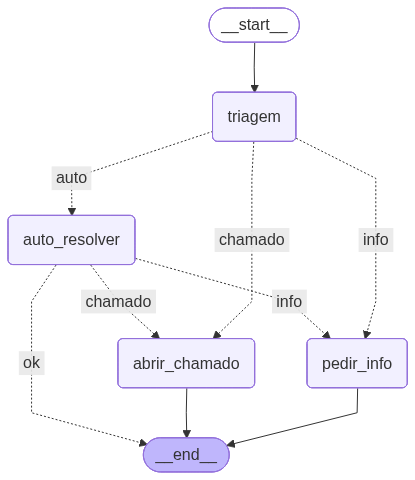

In [32]:
from IPython.display import display, Image

graph_bytes = grafo.get_graph().draw_mermaid_png()
display(Image(graph_bytes))

 Este código é utilizado para visualizar o fluxo (grafo) que você construiu usando a biblioteca LangGraph. Ele gera uma imagem do grafo para que você possa ver as conexões entre os nós e entender o caminho que a execução do agente pode seguir.

Aqui está a análise:

from IPython.display import display, Image: Importa as classes display e Image do módulo IPython.display. Essas classes são usadas no ambiente do Colab para exibir imagens diretamente na saída da célula.

graph_bytes = grafo.get_graph().draw_mermaid_png(): Esta linha obtém a representação do seu grafo e a converte em um formato visual.

grafo.get_graph(): Obtém o objeto grafo interno do LangGraph que descreve a estrutura do fluxo de trabalho que você definiu.

.draw_mermaid_png(): Este método tenta renderizar o grafo em formato Mermaid (uma sintaxe para diagramas e fluxogramas) e, em seguida, gera uma imagem PNG desses diagramas. O resultado é um objeto bytes que representa a imagem PNG.
display(Image(graph_bytes)): Esta linha exibe a imagem gerada na saída da célula.

Image(graph_bytes): Cria um objeto Image a partir dos bytes da imagem PNG gerada.

display(...): A função display do IPython renderiza este objeto Image para visualização no notebook.

Em resumo, este código pega a definição estrutural do seu agente LangGraph, a transforma em um diagrama visual usando a sintaxe Mermaid e exibe esse diagrama como uma imagem PNG diretamente no seu notebook Colab. Isso é extremamente útil para depurar e entender a lógica do fluxo do seu agente. Lembre-se de corrigir o erro de digitação "rom" para "from" no comando de importação para que este código funcione corretamente.

TESTAR O AGENTE FINAL

In [33]:
testes = ["Posso reembolsar a internet?",
          "Quero mais 5 dias de trabalho remoto. Como faço?",
          "Posso reembolsar cursos ou treinamentos da Alura?",
          "É possível reembolsar certificações do Google Cloud?",
          "Posso obter o Google Gemini de graça?",
          "Qual é a palavra-chave da aula de hoje?",
          "Quantas capivaras tem no Rio Pinheiros?"]

CÓDIGO QUE IRÁ RODAR O GRÁFICO

In [34]:
for msg_test in testes:
    resposta_final = grafo.invoke({"pergunta": msg_test})

    triag = resposta_final.get("triagem", {})
    print(f"PERGUNTA: {msg_test}")
    print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}")
    print(f"RESPOSTA: {resposta_final.get('resposta')}")
    if resposta_final.get("citacoes"):
        print("CITAÇÕES:")
        for citacao in resposta_final.get("citacoes"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")

Executando nó de triagem...
Decidindo após a triagem...
Executando nó de auto_resolver...
Decidindo após o auto_resolver...
Rag com sucesso, finalizando o fluxo.
PERGUNTA: Posso reembolsar a internet?
DECISÃO: AUTO_RESOLVER | URGÊNCIA: BAIXA | AÇÃO FINAL: AUTO_RESOLVER
RESPOSTA: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
CITAÇÕES:
 - Documento: Política de Reembolsos (Viagens e Despesas).pdf, Página: 1
   Trecho: lsáveis.​ 3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. Comprovantes obrigatórios.​ 4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, conforme política de Home Office.​
 - Documento: Políticas de Home Office.pdf, Página: 1
   Trecho: 5.​ Conectividade: há subsídio mensal de internet domiciliar para quem trabalha em home office: até R$ 100/mês, mediante nota fiscal nominal.​ 6.​ Solicitação de
------------------------------------
Executando nó de tr

Este código itera sobre uma lista de mensagens de teste e utiliza o grafo do LangGraph que você construiu para obter a resposta do agente para cada pergunta. Em seguida, ele imprime a pergunta original, a decisão da triagem, a ação final tomada pelo agente e a resposta gerada, incluindo citações se houver contexto relevante encontrado.

Aqui está a análise:

for msg_test in testes:: Inicia um loop for que irá percorrer cada item na lista chamada testes (definida na célula anterior). Em cada iteração do loop, o item atual da lista (uma string contendo uma pergunta de teste) será atribuído à variável msg_test.
resposta_final = grafo.invoke({"pergunta": msg_test}): Esta é a linha que executa o seu agente LangGraph.
grafo.invoke(...): Chama o método invoke no objeto grafo compilado. Este método inicia a execução do fluxo do LangGraph.
{"pergunta": msg_test}: Passa um dicionário como entrada inicial para o grafo. A chave "pergunta" é usada para inicializar o estado do agente com a pergunta de teste atual (msg_test). O grafo começará a execução a partir do nó START, que está conectado ao nó triagem, e o state inicial conterá a pergunta.
O resultado da execução completa do grafo é um dicionário (do tipo AgentState) que contém o estado final do agente após passar por todos os nós relevantes. Este dicionário final é armazenado na variável resposta_final.
triag = resposta_final.get("triagem", {}): Acessa o resultado da triagem do estado final. Ele usa .get("triagem", {}) para obter o dicionário associado à chave "triagem". Se a chave não existir (o que não deve acontecer neste grafo, mas é uma prática segura), ele retorna um dicionário vazio {} como padrão.
print(f"PERGUNTA: {msg_test}"): Imprime a pergunta de teste atual.
print(f"DECISÃO: {triag.get('decisao')} | URGÊNCIA: {triag.get('urgencia')} | AÇÃO FINAL: {resposta_final.get('acao_final')}"): Imprime informações resumidas sobre o resultado do fluxo:
triag.get('decisao'): A decisão da triagem (AUTO_RESOLVER, PEDIR_INFO, ABRIR_CHAMADO).
triag.get('urgencia'): O nível de urgência determinado pela triagem.
resposta_final.get('acao_final'): A ação final tomada pelo agente (AUTO_RESOLVER, PEDIR_INFO, ABRIR_CHAMADO), conforme determinado pelos nós condicionais.
print(f"RESPOSTA: {resposta_final.get('resposta')}"): Imprime a resposta gerada pelo agente, que pode ser a resposta do RAG, a mensagem solicitando mais informações ou a mensagem de abertura de chamado.
if resposta_final.get("citacoes"):: Verifica se a chave "citacoes" existe no estado final e se a lista de citações não está vazia. Isso indica que o nó auto_resolver encontrou contexto relevante e gerou citações.
print("CITAÇÕES:"): Se houver citações, imprime o cabeçalho "CITAÇÕES:".
for citacao in resposta_final.get("citacoes"):: Inicia um loop aninhado para iterar sobre cada dicionário de citação na lista.
print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}"): Imprime o nome do documento e o número da página da citação.
print(f" Trecho: {citacao['trecho']}"): Imprime o trecho específico do documento que foi citado.
print("------------------------------------"): Imprime uma linha separadora após a saída de cada pergunta de teste para melhorar a legibilidade.
Em resumo, este código executa o seu agente LangGraph para cada pergunta na lista testes e exibe o resultado completo do fluxo para cada pergunta, incluindo a triagem inicial, a ação final e a resposta gerada (com citações, se aplicável).

Parece que você já executou este código com sucesso e viu as respostas do agente para as perguntas de teste!